In [28]:
import numpy as np
import pandas as pd


In [29]:
books = pd.read_csv("books.csv")
print(books.shape)
print(books.iloc[1])
print(books.columns)

(10000, 23)
book_id                                                                      2
goodreads_book_id                                                            3
best_book_id                                                                 3
work_id                                                                4640799
books_count                                                                491
isbn                                                                 439554934
isbn13                                                         9780439554930.0
authors                                            J.K. Rowling, Mary GrandPré
original_publication_year                                               1997.0
original_title                        Harry Potter and the Philosopher's Stone
title                        Harry Potter and the Sorcerer's Stone (Harry P...
language_code                                                              eng
average_rating                          

In [30]:
to_reads = pd.read_csv("to_read.csv")
to_reads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [31]:
to_reads.groupby('user_id').count()

,book_id
user_id,
1,7
2,32
3,13
5,4
6,13
...,...
53420,9
53421,8
53422,28


### Exloiter les livres que les users veulent lire.
- Il y a 9986 livres
- 34 livres sont d'à lire qu'1 fois

In [32]:
to_read_by_livre = to_reads.groupby('book_id').count().reset_index()
to_read_by_livre = to_read_by_livre.rename(columns={'user_id':'nb_lire'})


In [33]:
to_read_by_livre_sort = to_read_by_livre.sort_values('nb_lire', axis=0, ascending=False)

In [34]:
livre_to_read_1fois = to_read_by_livre_sort[to_read_by_livre_sort['nb_lire']==1].copy()
livre_to_read_1fois.head(5)

,book_id,nb_lire
3277,3279,1
9823,9838,1
9111,9124,1
9293,9307,1
4806,4812,1


In [35]:
ratings = pd.read_csv("ratings.csv")
print(ratings.shape)
print(ratings.iloc[1])
print(ratings.columns)

(5976479, 3)
user_id       2
book_id    4081
rating        4
Name: 1, dtype: int64
Index(['user_id', 'book_id', 'rating'], dtype='object')


In [36]:
## Caculer le note moyen, count_note by lirve

In [37]:
ratings_by_livre = pd.DataFrame(ratings.groupby('book_id')['rating'].mean())
ratings_by_livre['nb_note'] = ratings.groupby('book_id')['book_id'].count()
ratings_by_livre.shape

(10000, 2)

### Merger livre_to_read_1fois et ratings_by_livre 
### -> pour savoir la raison que ces livres sont demandé trop peu de lire
- Les livres à lire 1 fois ont des notes moyens élevés et des fois notés acceptables (plus 50 fois, sauf un livre qui a 11 fois de noter)

In [38]:
livre_to_read_1fois = pd.merge(livre_to_read_1fois,ratings_by_livre, on='book_id', how='left')
livre_to_read_1fois

,book_id,nb_lire,rating,nb_note
0,3279,1,4.175676,444
1,9838,1,4.432099,81
2,9124,1,4.203252,123
3,9307,1,4.094340,53
4,4812,1,4.430769,260
5,9739,1,3.977778,90
6,6345,1,4.123188,276
7,7951,1,4.120155,258
8,9665,1,3.953488,86
9,4869,1,4.492823,209


In [39]:
ratings.groupby('book_id')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
book_id,,,,,,,,
1,22806.0,4.279707,0.868680,1.0,4.0,4.0,5.0,5.0
2,21850.0,4.351350,0.864940,1.0,4.0,5.0,5.0,5.0
3,16931.0,3.214341,1.381661,1.0,2.0,3.0,4.0,5.0
4,19088.0,4.329369,0.860533,1.0,4.0,5.0,5.0,5.0
5,16604.0,3.772224,1.044125,1.0,3.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...
9996,141.0,4.014184,0.902266,1.0,4.0,4.0,5.0,5.0
9997,93.0,4.451613,0.744781,1.0,4.0,5.0,5.0,5.0
9998,102.0,4.323529,0.719760,3.0,4.0,4.0,5.0,5.0


## Calculer nb de vote par utilisateur
nb de vote minimum par user est 19, maximum est 200

In [40]:
count_p_user = (ratings.groupby(by=['user_id'])['rating']
                  .count()
                  .reset_index()
                  .rename(columns={'rating': 'nombre_rating_user'}))
count_p_user.describe()

#chaque utilisateur a noté au minimum 19 fois (livre)

,user_id,nombre_rating_user
count,53424.000000,53424.000000
mean,26712.500000,111.868804
std,15422.324727,26.071224
min,1.000000,19.000000
25%,13356.750000,96.000000
50%,26712.500000,111.000000
75%,40068.250000,128.000000
max,53424.000000,200.000000


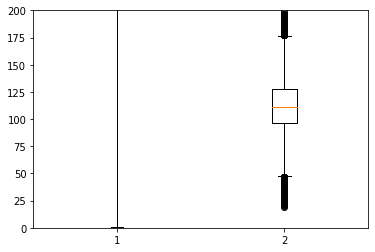

In [41]:
import matplotlib.pyplot as plt

data = count_p_user

plt.boxplot(data)

plt.ylim(0,200)

plt.show()


In [42]:
ratings[(ratings['user_id']==12874) | (ratings['user_id']==30944) ].groupby('user_id').describe()

# les users qui ont noté le plus de fois (200 fois) donnent le notes plus évelés (>3.0)

book_id                                                           \
          count    mean          std  min     25%    50%     75%     max   
user_id                                                                    
12874     200.0  812.89  1286.261131  2.0  115.75  342.0  873.25  8916.0   
30944     200.0  741.57   859.345319  2.0  167.75  445.5  967.25  4653.0   

        rating                                           
         count  mean       std  min  25%  50%  75%  max  
user_id                                                  
12874    200.0  3.45  0.860933  2.0  3.0  4.0  4.0  5.0  
30944    200.0  4.21  0.760785  2.0  4.0  4.0  5.0  5.0

In [43]:
# il y a 899 users qui ont voté moins 50 fois

id_user_moins50 = count_p_user[count_p_user['nombre_rating_user']<50]['user_id'].tolist()
print(len(id_user_moins50))

899


## Explication: 
- environ 50% d'user votent entre 90 - 125 fois
- 1,12% vote au moins 175 fois
- 1,68% vote moins de 50 fois

In [44]:
print("Il y a ", count_p_user.shape[0], " users \n")
print("nb d'user votant au moins 175 fois: ", count_p_user[count_p_user["nombre_rating_user"]>=175]["user_id"].count())
print("% = ", count_p_user[count_p_user["nombre_rating_user"]>=175]["user_id"].count()/count_p_user.shape[0])
print()
print("nb d'user votant moins de 50 fois: ", count_p_user[count_p_user["nombre_rating_user"]<50]["user_id"].count())
print("% = ", count_p_user[count_p_user["nombre_rating_user"]<50]["user_id"].count()/count_p_user.shape[0])


Il y a  53424  users 

nb d'user votant au moins 175 fois:  596
% =  0.011156034740940401

nb d'user votant moins de 50 fois:  899
% =  0.01682764300688829


In [45]:
count_p_user[(count_p_user["nombre_rating_user"]<90) & (count_p_user["nombre_rating_user"]>=50) ]["user_id"].count()

8130

In [46]:
user_count_rating = pd.DataFrame(ratings.groupby("user_id")["rating"].count().sort_index())
user_count_rating = user_count_rating.reset_index()
user_count_rating = user_count_rating.rename(columns={"index": "user_id"})

user_count_rating

,user_id,rating
0,1,117
1,2,65
2,3,91
3,4,134
4,5,100
...,...,...
53419,53420,110
53420,53421,110
53421,53422,130
53422,53423,77


In [47]:
book_tags = pd.read_csv("book_tags.csv")
book_tags.shape

(999912, 3)

In [48]:
book_tags.columns

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')

### Commenter:  les livres ont 100 tags (sauf 3 livres) 
-> nb de tags maximum pour un livre est 100 ???

In [49]:
book_tags['goodreads_book_id'].value_counts()



1           100
6344097     100
6338619     100
6339304     100
6339664     100
           ... 
91571       100
33288638    100
280958       94
18607805     62
22931009     56
Name: goodreads_book_id, Length: 10000, dtype: int64

In [50]:
nb_tag_livre = pd.DataFrame(book_tags['tag_id'].value_counts().reset_index())
nb_tag_livre = nb_tag_livre.rename(columns={'index':'tag_id', 'tag_id':'nb_fois'})
nb_tag_livre


,tag_id,nb_fois
0,30574,9983
1,11557,9881
2,22743,9858
3,5207,9799
4,8717,9776
...,...,...
34247,24448,1
34248,4369,1
34249,22380,1
34250,4118,1


### Liste de tags sont utilisés une seule fois
- Il y a 17175 tags (50% de tags (avance de nettoyer))
- ON NE LES SUPPRIME PAS


In [51]:
tag_1_fois = nb_tag_livre[nb_tag_livre['nb_fois']<2]
tag_1_fois

,tag_id,nb_fois
17095,33809,1
17096,29287,1
17097,28503,1
17098,26544,1
17099,27124,1
...,...,...
34247,24448,1
34248,4369,1
34249,22380,1
34250,4118,1


In [52]:
tag_1_fois.shape[0]/nb_tag_livre.shape[0]

0.5009050566390284

In [53]:
tags = pd.read_csv("tags.csv")

In [54]:
merge_tag_1_fois = tag_1_fois.merge(tags)

In [55]:
merge_tag_1_fois.sort_values(by=['tag_name', 'tag_id'])

,tag_id,nb_fois,tag_name
14111,2,1,--10-
10069,3,1,--12-
15227,4,1,--122-
9618,5,1,--166-
9617,6,1,--17-
...,...,...,...
250,34245,1,ﺭﺿﻮﻯ-عاشور
824,34246,1,ﻳﻮﺳﻒ-زيدان
15939,34249,1,Ｍａｎｇａ
12187,34250,1,ＳＥＲＩＥＳ


# Recommendation basé s/nombre de rating

In [56]:
#créer DF 2 cols: book_id et nb de note
rating_count = pd.DataFrame(ratings.groupby('book_id')['rating'].count())
#lister 10 livres les plus notés
top10_book_rating = rating_count.sort_values("rating", ascending=False).head(10)

In [57]:
ratings.groupby('book_id')['rating'].mean()

book_id
1        4.279707
2        4.351350
3        3.214341
4        4.329369
5        3.772224
           ...   
9996     4.014184
9997     4.451613
9998     4.323529
9999     3.707692
10000    4.009009
Name: rating, Length: 10000, dtype: float64

In [58]:
top10_book_rating = pd.DataFrame(top10_book_rating, np.arange(10), columns=["book_id"])
top10_book_rating  

,book_id
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [59]:
books_rate = pd.merge(top10_book_rating, books, on="book_id")
books_rate

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url


# recommandation: les livres ont les plus rating

In [60]:
books_rate[["book_id", "isbn", "title", "original_title"]]

,book_id,isbn,title,original_title


In [61]:
books_rate[:1].T

""
book_id
goodreads_book_id
best_book_id
work_id
books_count
isbn
isbn13
authors
original_publication_year
original_title


In [68]:
summary_rating_book1 = pd.DataFrame(ratings[ratings["book_id"]==1].groupby("rating")["rating"].count(), np.arange(5)+1, columns=["rating"])
#summary_rating_book1 = summary_rating_book1.reset_index()

#summary_rating_book1 = summary_rating_book1.rename(columns={"index": "note"})
#summary_rating_book1["note_total"] = summary_rating_book1["rating"]*summary_rating_book1.note
summary_rating_book1

,rating
1,231
2,636
3,3013
4,7569
5,11357


In [63]:
ratings.groupby("user_id")["user_id"].count().sort_index()

user_id
1        117
2         65
3         91
4        134
5        100
        ... 
53420    110
53421    110
53422    130
53423     77
53424    133
Name: user_id, Length: 53424, dtype: int64

In [64]:
to_reads = pd.read_csv("to_read.csv")
print(to_reads.shape)
print(to_reads.columns)

(912705, 2)
Index(['user_id', 'book_id'], dtype='object')


In [65]:
to_reads.groupby("user_id")["user_id"].count()

user_id
1         7
2        32
3        13
5         4
6        13
         ..
53420     9
53421     8
53422    28
53423    21
53424    20
Name: user_id, Length: 48871, dtype: int64

In [66]:
to_reads.groupby("book_id")["book_id"].count()

book_id
1         973
2         400
3         287
4        1478
5        1293
         ... 
9996       17
9997       22
9998        6
9999       88
10000      25
Name: book_id, Length: 9986, dtype: int64